In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = randn(25)

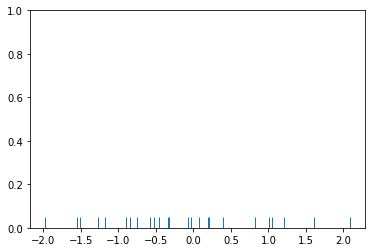

In [3]:
sns.rugplot(dataset)

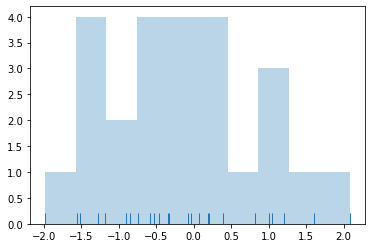

In [4]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

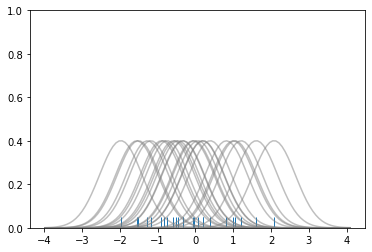

In [5]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

kernel_list = []
for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel/kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)
    
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

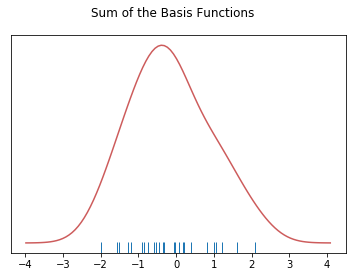

In [6]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the Basis Functions')

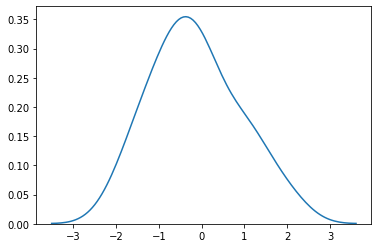

In [8]:
sns.kdeplot(dataset)

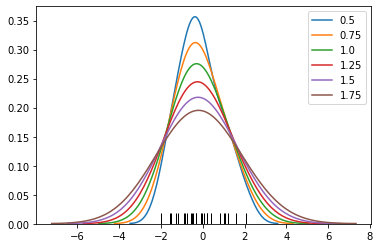

In [13]:
sns.rugplot(dataset, color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,label=bw)

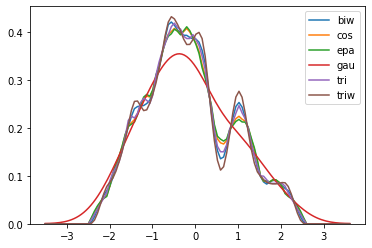

In [14]:
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

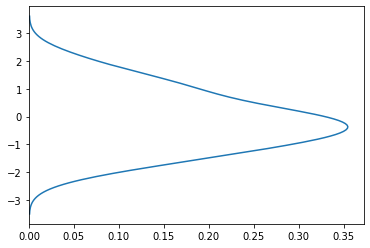

In [15]:
sns.kdeplot(dataset, vertical=True)

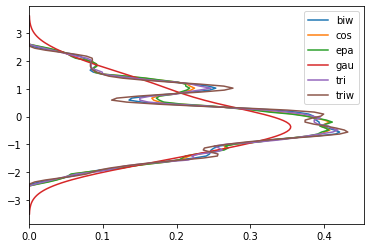

In [16]:
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern, vertical=True)

(array([1., 4., 2., 4., 4., 4., 1., 3., 1., 1.]),
 array([-1.97582492, -1.57001658, -1.16420824, -0.7583999 , -0.35259156,
         0.05321677,  0.45902511,  0.86483345,  1.27064179,  1.67645013,
         2.08225846]),
 <a list of 10 Patch objects>)

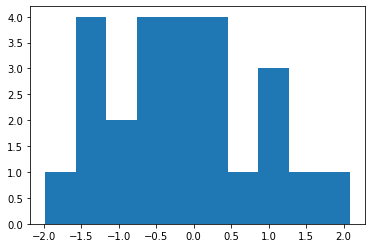

In [17]:
plt.hist(dataset)

(array([ 1.,  5.,  7., 11., 15., 19., 20., 23., 24., 25.]),
 array([-1.97582492, -1.57001658, -1.16420824, -0.7583999 , -0.35259156,
         0.05321677,  0.45902511,  0.86483345,  1.27064179,  1.67645013,
         2.08225846]),
 <a list of 10 Patch objects>)

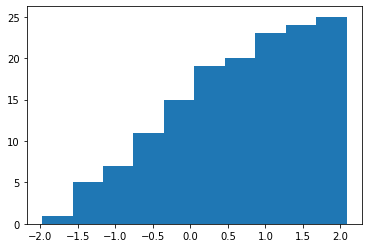

In [18]:
plt.hist(dataset, cumulative=True)

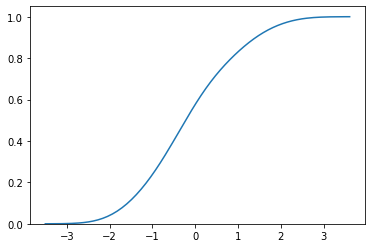

In [19]:
sns.kdeplot(dataset, cumulative=True)

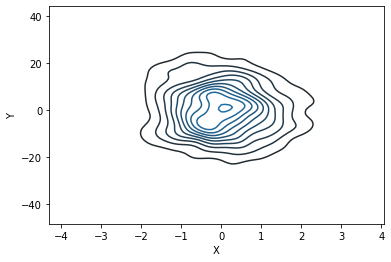

In [22]:
# 2次元平面上の中心
mean = [0,0]
# それぞれの分散を決めます。
cov = [[1,0],[0,100]]
# これに従う多変量正規分布
dataset2 = np.random.multivariate_normal(mean,cov,1000)
# DataFrameにしておきましょう。
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
# プロットします。SeabornとPandasの相性は抜群
sns.kdeplot(dframe['X'], dframe['Y'])

In [23]:
dframe

,X,Y
0,0.287528,-4.834491
1,1.449469,-4.309664
2,1.970958,7.646402
3,1.057890,15.541367
4,0.495772,23.345970
...,...,...
995,-1.353519,-9.308160
996,-0.175814,-15.171086
997,-0.130499,7.303046
998,0.407231,18.701045


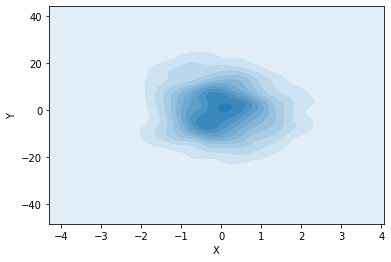

In [25]:
sns.kdeplot(dframe.X, dframe.Y, shade=True)

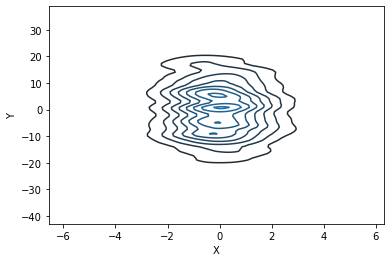

In [26]:
sns.kdeplot(dframe.X, dframe.Y, bw=1)

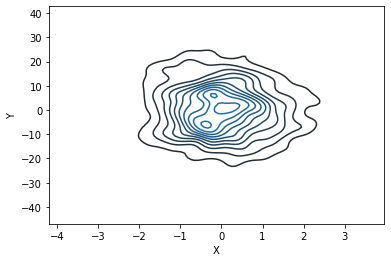

In [27]:
sns.kdeplot(dframe.X, dframe.Y, bw='silverman')

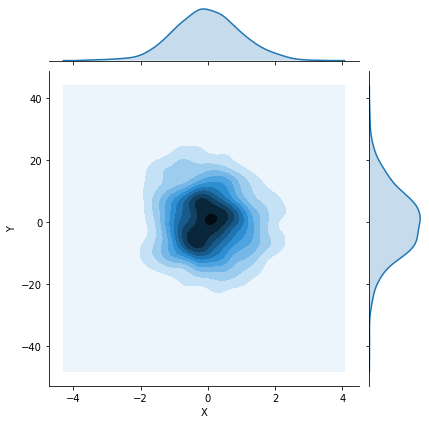

In [29]:
sns.jointplot('X', 'Y', dframe, kind='kde')